In [1]:
from nilmtk.api import API
import warnings

warnings.filterwarnings("ignore")
from nilmtk.disaggregate import DM_SDA, GaterSGN, SGN, DM_GATE2

In [2]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
import pytorch_lightning as pl

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# from src import *

USE_GPU = True
device = torch.device("cuda:0" if USE_GPU and torch.cuda.is_available() else "cpu")
print(torch.__version__, pl.__version__, device)

2.0.1 2.0.4 cuda:0


DM_GATE2
............... Loading Data for training ...................
Loading data for  ukdale  dataset
Loading building ...  5
Dropping missing values
Train Jointly
...............SGN partial_fit running...............
First model training for  fridge
Started training for  DM_GATE2
Joint training for  DM_GATE2
............... Loading Data for training ...................
Loading data for  ukdale  dataset
Loading building ...  5
Dropping missing values
Train Jointly
Doing Preprocessing
Train df <class 'list'>
Train main (95041, 720, 1)


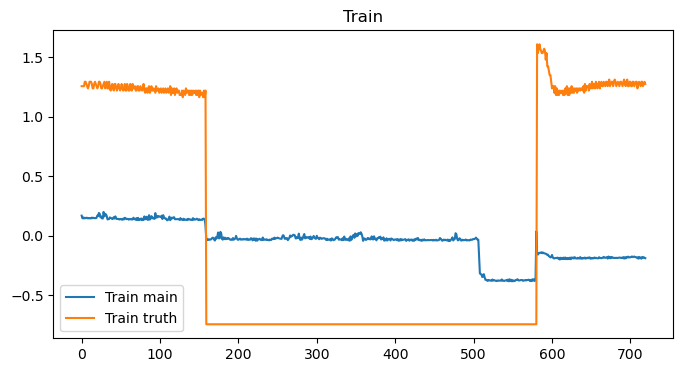

First model training for fridge
Is Time embed used ?  True
Loaded from ./fridge_dm_best_state_dict.pt
Finished training for  DM_GATE2
Joint Testing for all algorithms
Loading data for  ukdale  dataset
Dropping missing values
Generating predictions for : SGN
Inference Time consumption: 62.13194251060486s.
Generating predictions for : DM_GATE2
Start dm disaggregating
Disaggregating fridge
test main (1482, 720, 1)
Inference Time consumption: 10.848140239715576s.
fridge prediction done, computing results
............  mae  ..............
         DM_GATE2
fridge  15.960619
............  accuracy  ..............
        DM_GATE2
fridge   0.88359
............  f1score  ..............
        DM_GATE2
fridge  0.859642
............  recall  ..............
        DM_GATE2
fridge  0.767616
............  precision  ..............
        DM_GATE2
fridge  0.976737
............  nep  ..............
        DM_GATE2
fridge  0.339616
............  MCC  ..............
        DM_GATE2
fridge  0.77879

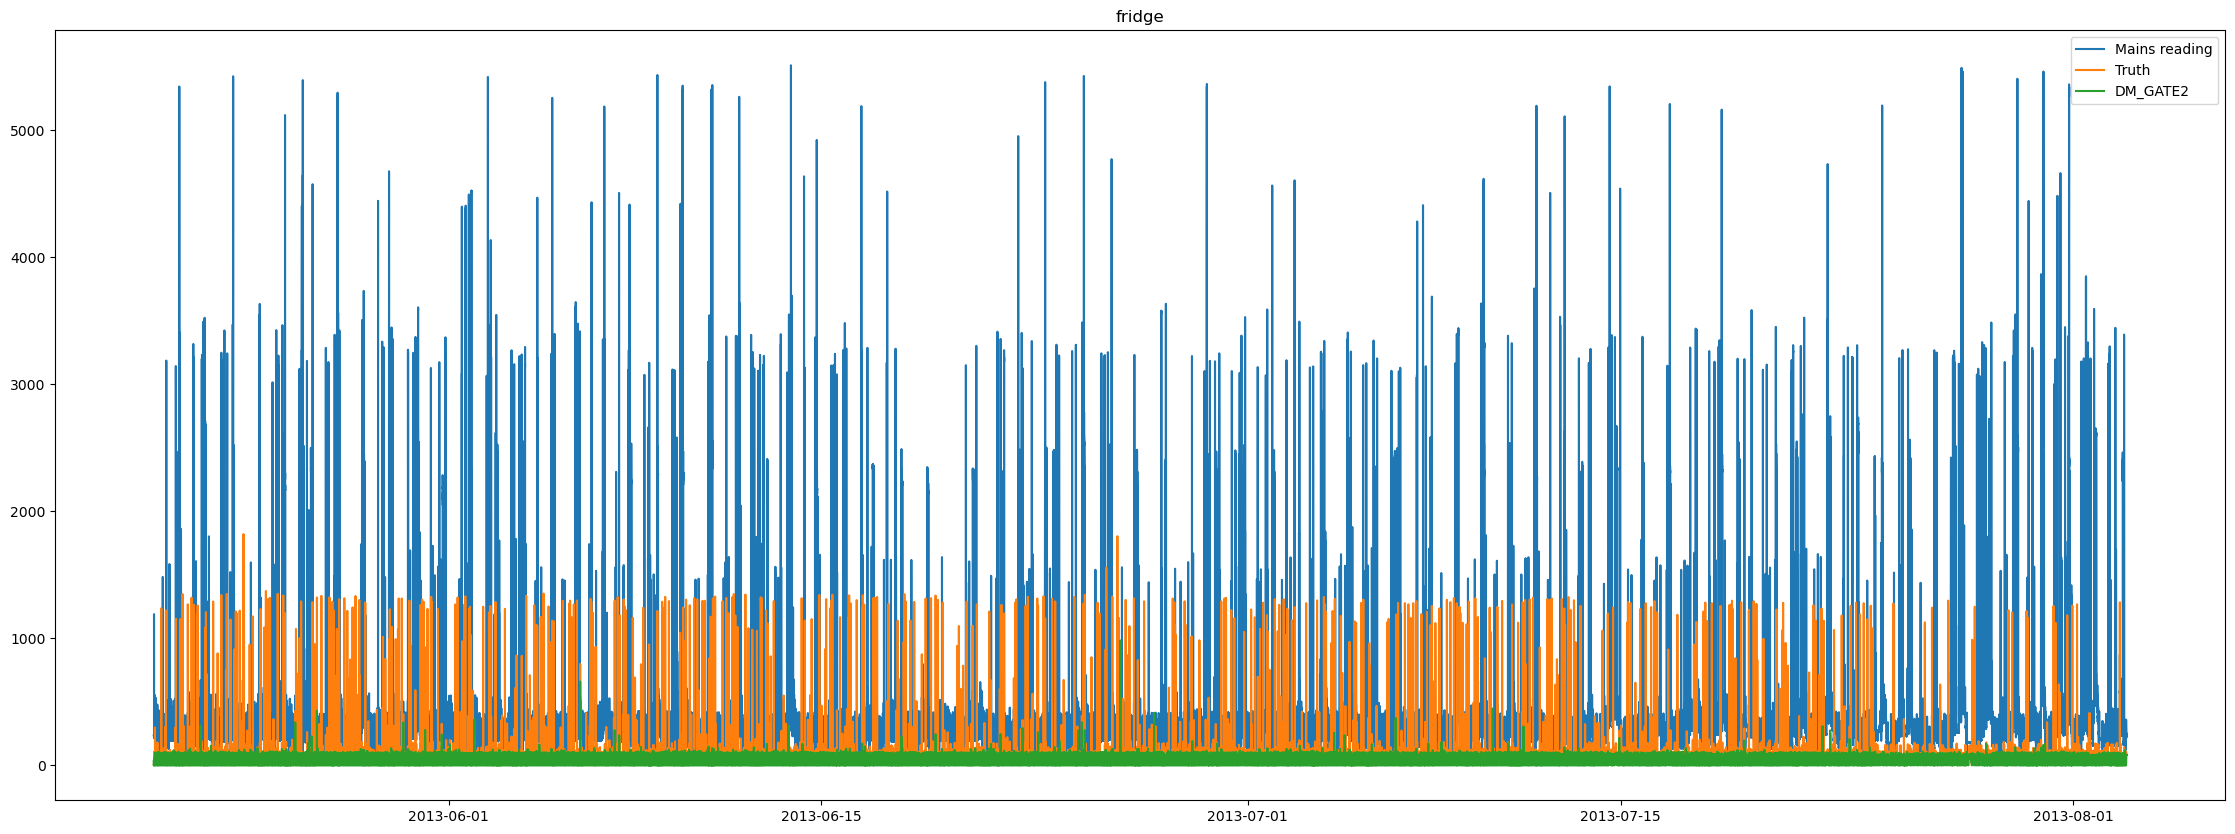

In [3]:
e = {
    # Specify power type, sample rate and disaggregated appliance
    'power': {
        'mains': ['active'],
        # 'appliance': ['active']
        # 'mains': ['apparent'],  # problem: ukdale active, redd apparent
        'appliance': ['active']
    },
    'sample_rate': 6,
    'appliances': ['fridge'],
    # 'appliances': ['washing machine'],
    # Universally no pre-training
    'pre_trained': False,
    # Specify algorithm hyper-parameters
    'gater': 
        # "GaterSGN": GaterSGN(
        # {'n_epochs': 10, 'batch_size': 256, 'test_only': False}),
        SGN({'n_epochs': 5, 'batch_size': 256, 'test_only': True, 'gate_only': True})
        ,
    'methods': {"DM_GATE2": DM_GATE2(
        {'n_epochs': 7, 'batch_size': 64, 'sequence_length': 720, 'overlapping_step': 10,
         'test_only': True, 'sda': False, 'fine_tune': False, 'src_rate': 0.5, 'lr': 5e-6, "sampler": "ddim"})},
    # Specify train and test data
    'train': {
        'datasets': {
            'ukdale': {
                'path': 'mnt/ukdale.h5',
                'buildings': {
                    # 1: {
                    #     'start_time': '2013-05-31',
                    #     'end_time': '2014-12-31'
                    # },
                    # 2: {
                    #     'start_time': '2013-05-22',
                    #     'end_time': '2013-08-01'
                    # },
                    5: {
                        'start_time': '2014-07-01',
                        'end_time': '2014-09-05'
                    },
                }
            },
        }
    },
    # 'transfer': {
    #     'datasets': {
    #         'redd': {
    #             'path': 'mnt/redd.h5',
    #             'buildings': {
    #                 # 1: {
    #                 #     'start_time': '2011-04-19',
    #                 #     'end_time': '2011-05-04'
    #                 # }
    #                 2: {
    #                     'start_time': '2011-04-18',
    #                     'end_time': '2011-04-25'
    #                 }
    #             }
    #         },
    #         # 'ukdale': {
    #         #   'path': 'mnt/ukdale.h5',
    #         #   'buildings': {
    #         #         1: {
    #         #               'start_time': '2013-05-01 00:00',
    #         #               'end_time': '2013-05-14 00:00'
    #         #         }
    #         #     }
    #         #   },
    #     },
    # },
    'test': {
        'datasets': {
            'ukdale': {
              'path': 'mnt/ukdale.h5',
              'buildings': {
                    2: {
                          'start_time': '2013-05-20 00:00',
                          'end_time': '2013-08-03 00:00'
                    },
                }
              },
            # 'redd': {
            #     'path': 'mnt/redd.h5',
            #     'buildings': {
            #         2: {
            #             'start_time': '2011-04-26',
            #             'end_time': '2011-04-30'
            #         }
            #     }
            #     # 'buildings': {
            #     #     2: {
            #     #         'start_time': '2011-05-05',
            #     #         'end_time': '2011-05-22'
            #     #     }
            #     # }
            # },
        },
        # Specify evaluation metrics
        'metrics': ['mae', 'accuracy', 'f1score', 'recall', 'precision', 'nep', 'MCC']
    }
}

API(e)